<center><h1>Avhad_Deepa_HW6</h1></center>

Name: Deepa Avhad
<br>
Github Username: d-avhad
<br>
USC ID:7023239026 

References:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

https://xgboost.readthedocs.io/en/stable/parameter.html

https://stackoverflow.com/questions/37612434/what-are-ways-to-speed-up-seaborns-pairplot

https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://towardsdatascience.com/smote-fdce2f605729

## 1. Tree-Based Methods

Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.impute import SimpleImputer


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


import pprint
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold


from imblearn.over_sampling import SMOTE
from statistics import mean

### (a) Download the APS Failure data

In [2]:
aps_failure_description_file = '../data/aps_failure_description.txt'

In [3]:
#replacing na values by NaN
# let class- neg-0 ; pos-1
train_data = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
test_data = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values='na')

train_data['class'].replace({'pos':1,'neg':0},inplace=True)
test_data['class'].replace({'pos':1,'neg':0},inplace=True)

print("Training Data Shape: ", train_data.shape)
print("Testing Data Shape: ", test_data.shape)

Training Data Shape:  (60000, 171)
Testing Data Shape:  (16000, 171)


In [4]:
train_data

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1          0   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2          0   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3          0      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4          0   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...     ...     ...           ...     ...     ...     ...     ...   
59995      0  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996      0    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997      0     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998      0   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999      0   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [5]:
test_data

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1          0      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2          0   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3          0   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4          0    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...     ...     ...           ...     ...     ...     ...     ...   
15995      0   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996      0      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997      0   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998      0     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999      0       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

<font color='blue'>
 The process of filling in missing data values with estimated values is known as Imputation technique. Following are the techniques discussed in class lectures and refernced from scikit website: <br>

1. Univariate vs. Multivariate Imputation <br>
Univariate- which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer).Multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).<br>
They use mean/median/mode of the data to replace the missing values.<br>

2. K-Nearest Neighbors (KNN) imputation:<br>
This technique involves filling in the missing values with the average of the k-nearest data points in the dataset.<br>

3. Regression imputation: <br>
This technique involves using regression models to predict the missing values based on the other variables in the dataset.<br>

4. Hot deck imputation: <br>
This technique involves filling in the missing values with values from another observation in the dataset that has similar characteristics.<br>


Here I will be making use of the mean using SimpleImputer to perform imputation for the missing data
    
</font>



In [6]:
imputed_train_data=train_data
imputed_test_data=test_data

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(train_data.iloc[:, 1:])

imputed_train_data.iloc[:, 1:] = imputer.transform(train_data.iloc[:, 1:])
imputed_test_data.iloc[:, 1:] = imputer.transform(test_data.iloc[:, 1:])

   

In [7]:
print("Imputed Train Data")
imputed_train_data

Imputed Train Data


class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0          0   76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1          0   33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2          0   41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          0      12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4          0   60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...       ...       ...           ...            ...     ...     ...   
59995      0  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996      0    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997      0     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998      0   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999      0   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [8]:
print("Imputed Test Data")
imputed_test_data

Imputed Test Data


class   aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0     60.0  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1          0     82.0  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2          0  66002.0  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3          0  59816.0  0.713189  1.010000e+03   936.0     0.0     0.0     0.0   
4          0   1814.0  0.713189  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...      ...       ...           ...     ...     ...     ...     ...   
15995      0  81852.0  0.713189  2.130706e+09   892.0     0.0     0.0     0.0   
15996      0     18.0  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997      0  79636.0  0.713189  1.670000e+03  1518.0     0.0     0.0     0.0   
15998      0    110.0  0.713189  3.600000e+01    32.0     0.0     0.0     0.0   
15999      0      8.0  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

In [9]:
print("Whole Imputed Data")
whole_data= pd.concat([imputed_train_data,imputed_test_data],ignore_index=True)
whole_data


Whole Imputed Data


class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0          0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1          0  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2          0  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4          0  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...      ...       ...           ...            ...     ...     ...   
75995      0  81852.0  0.713189  2.130706e+09     892.000000     0.0     0.0   
75996      0     18.0  0.000000  5.200000e+01      46.000000     8.0    26.0   
75997      0  79636.0  0.713189  1.670000e+03    1518.000000     0.0     0.0   
75998      0    110.0  0.713189  3.600000e+01      32.000000     0.0     0.0   
75999      0      8.0  0.000000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
75995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
75997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
75999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
75995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
75996       2.0       0.0       0.0      0.0     0.0     0.0  
75997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
75998    1004.0    1338.0      74.0      0.0     0.0     0.0  
75999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

#### (ii) Calculate the coefficient of variation

In [10]:
def create_labels(df):
    x_label = df.iloc[:, 1:]
    y_label= df.iloc[:, 0:1]
    return x_label, y_label

In [11]:
imputed_train_x, imputed_train_y = create_labels(imputed_train_data)
imputed_test_x, imputed_test_y = create_labels(imputed_test_data)


In [12]:
def calculate_cv(df):
    describe = df.describe(include='all')
    std = describe.loc['std']
    mean = describe.loc['mean']
    describe.loc['CV'] = std / mean
    return describe.loc[['std','mean','CV']]

In [13]:
cv_train = calculate_cv(imputed_train_x)

print("coefficient of variation CV for imputed train data: (170 features)")
cv_train

coefficient of variation CV for imputed train data: (170 features)


aa_000    ab_000        ac_000        ad_000      ae_000  \
std   145430.056532  1.660588  7.724678e+08  3.504515e+07  158.142022   
mean   59336.499567  0.713189  3.560143e+08  1.906206e+05    6.819130   
CV         2.450938  2.328400  2.169767e+00  1.838476e+02   23.190937   

          af_000        ag_000        ag_001         ag_002         ag_003  \
std   205.375337  20363.631242  34008.750683  149479.100501  757459.796689   
mean   11.006817    221.636367    975.722261    8606.014529   88591.281094   
CV     18.658921     91.878565     34.854950      17.369143       8.550049   

      ...        ee_002         ee_003        ee_004        ee_005  \
std   ...  1.149060e+06  540272.166338  1.161763e+06  1.114758e+06   
mean  ...  4.454897e+05  211126.447302  4.457343e+05  3.939462e+05   
CV    ...  2.579319e+00       2.558998  2.606402e+00  2.829722e+00   

            ee_006        ee_007         ee_008        ee_009     ef_000  \
std   1.063164e+06  1.718366e+06  446989.425928  47204.242869   4.268529   
mean  3.330582e+05  3.462714e+05  138729.983179   8388.914629   0.090579   
CV    3.192128e+00  4.962483e+00       3.222010      5.626979  47.124953   

         eg_000  
std    8.627929  
mean   0.212756  
CV    40.553250  

[3 rows x 170 columns]

In [14]:
cv_test = calculate_cv(imputed_test_x)

print("coefficient of variation CV for imputed test data (170 features):")
cv_test

coefficient of variation CV for imputed test data (170 features):


aa_000    ab_000        ac_000        ad_000      ae_000  \
std   503534.953222  1.234588  7.732975e+08  82233.609101  115.609854   
mean   67996.983750  0.726572  3.579221e+08  47758.943819    6.445200   
CV         7.405254  1.699196  2.160519e+00      1.721847   17.937357   

          af_000       ag_000        ag_001         ag_002        ag_003  ...  \
std   163.614017  6416.431053  88729.079517  234444.028539  1.019769e+06  ...   
mean   10.230919   122.048955   2051.345969   13731.096797  1.123437e+05  ...   
CV     15.992113    52.572602     43.254078      17.073948  9.077225e+00  ...   

            ee_002         ee_003        ee_004        ee_005        ee_006  \
std   1.247645e+06  579362.181259  1.259924e+06  1.251984e+06  1.192327e+06   
mean  4.646804e+05  221080.068243  4.688083e+05  4.252889e+05  3.556495e+05   
CV    2.684952e+00       2.620599  2.687503e+00  2.943844e+00  3.352533e+00   

            ee_007         ee_008        ee_009     ef_000     eg_000  
std   1.618744e+06  533591.985158  52978.681152   3.293317  13.993425  
mean  3.523279e+05  144209.370673   8558.297601   0.066189   0.241257  
CV    4.594424e+00       3.700120      6.190329  49.756394  58.002034  

[3 rows x 170 columns]

In [15]:
cv_whole = calculate_cv(whole_data.iloc[:, 1:])

print("coefficient of variation CV for imputed whole data (170 features):")
cv_whole

coefficient of variation CV for imputed whole data (170 features):


aa_000    ab_000        ac_000        ad_000      ae_000  \
std   264736.613729  1.580477  7.726379e+08  3.113846e+07  150.191549   
mean   61159.759395  0.716006  3.564159e+08  1.605445e+05    6.740408   
CV         4.328608  2.207351  2.167798e+00  1.939553e+02   22.282263   

          af_000        ag_000        ag_001         ag_002         ag_003  \
std   197.318607  18331.517120  50701.585116  170924.260833  819738.058342   
mean   10.843470    200.670596   1202.169357    9684.979217   93591.783391   
CV     18.196998     91.351287     42.175077      17.648387       8.758654   

      ...        ee_002         ee_003        ee_004        ee_005  \
std   ...  1.170523e+06  548744.193714  1.183134e+06  1.145078e+06   
mean  ...  4.495299e+05  213221.946448  4.505920e+05  4.005447e+05   
CV    ...  2.603882e+00       2.573582  2.625732e+00  2.858802e+00   

            ee_006        ee_007         ee_008        ee_009     ef_000  \
std   1.091658e+06  1.697870e+06  466560.930263  48476.793230   4.082618   
mean  3.378143e+05  3.475465e+05  139883.538441   8424.574202   0.085444   
CV    3.231533e+00  4.885304e+00       3.335353      5.754213  47.781107   

         eg_000  
std    9.999582  
mean   0.218756  
CV    45.711130  

[3 rows x 170 columns]

#### (iii) Plot a correlation matrix

In [16]:
print("correlation matrix for whole data features")
corr=whole_data.iloc[:, 1:].corr()
corr.style.background_gradient(cmap='coolwarm')

#corr

correlation matrix for whole data features


#### (iv) Make scatter plots and box plots

In [17]:

cv_sorted = cv_whole.loc['CV'].sort_values(ascending=False)
cv_sorted

cf_000    194.438323
co_000    194.089168
ad_000    193.955307
cs_009    193.045035
dj_000    120.084900
             ...    
bo_000      0.461460
bp_000      0.425256
bq_000      0.398499
br_000      0.382003
cd_000      0.000000
Name: CV, Length: 170, dtype: float64

In [18]:
features_to_select = int(np.sqrt(170))
highest_cv_features = cv_sorted[:features_to_select]
print("Following  sqrt(170)=",features_to_select," features have highest CV: ")
highest_cv_features

Following  sqrt(170)= 13  features have highest CV: 


cf_000    194.438323
co_000    194.089168
ad_000    193.955307
cs_009    193.045035
dj_000    120.084900
df_000    116.138172
as_000    114.464381
dh_000    111.946396
ag_000     91.351287
au_000     86.293581
ak_000     78.559993
az_009     77.894525
ay_009     77.457761
Name: CV, dtype: float64

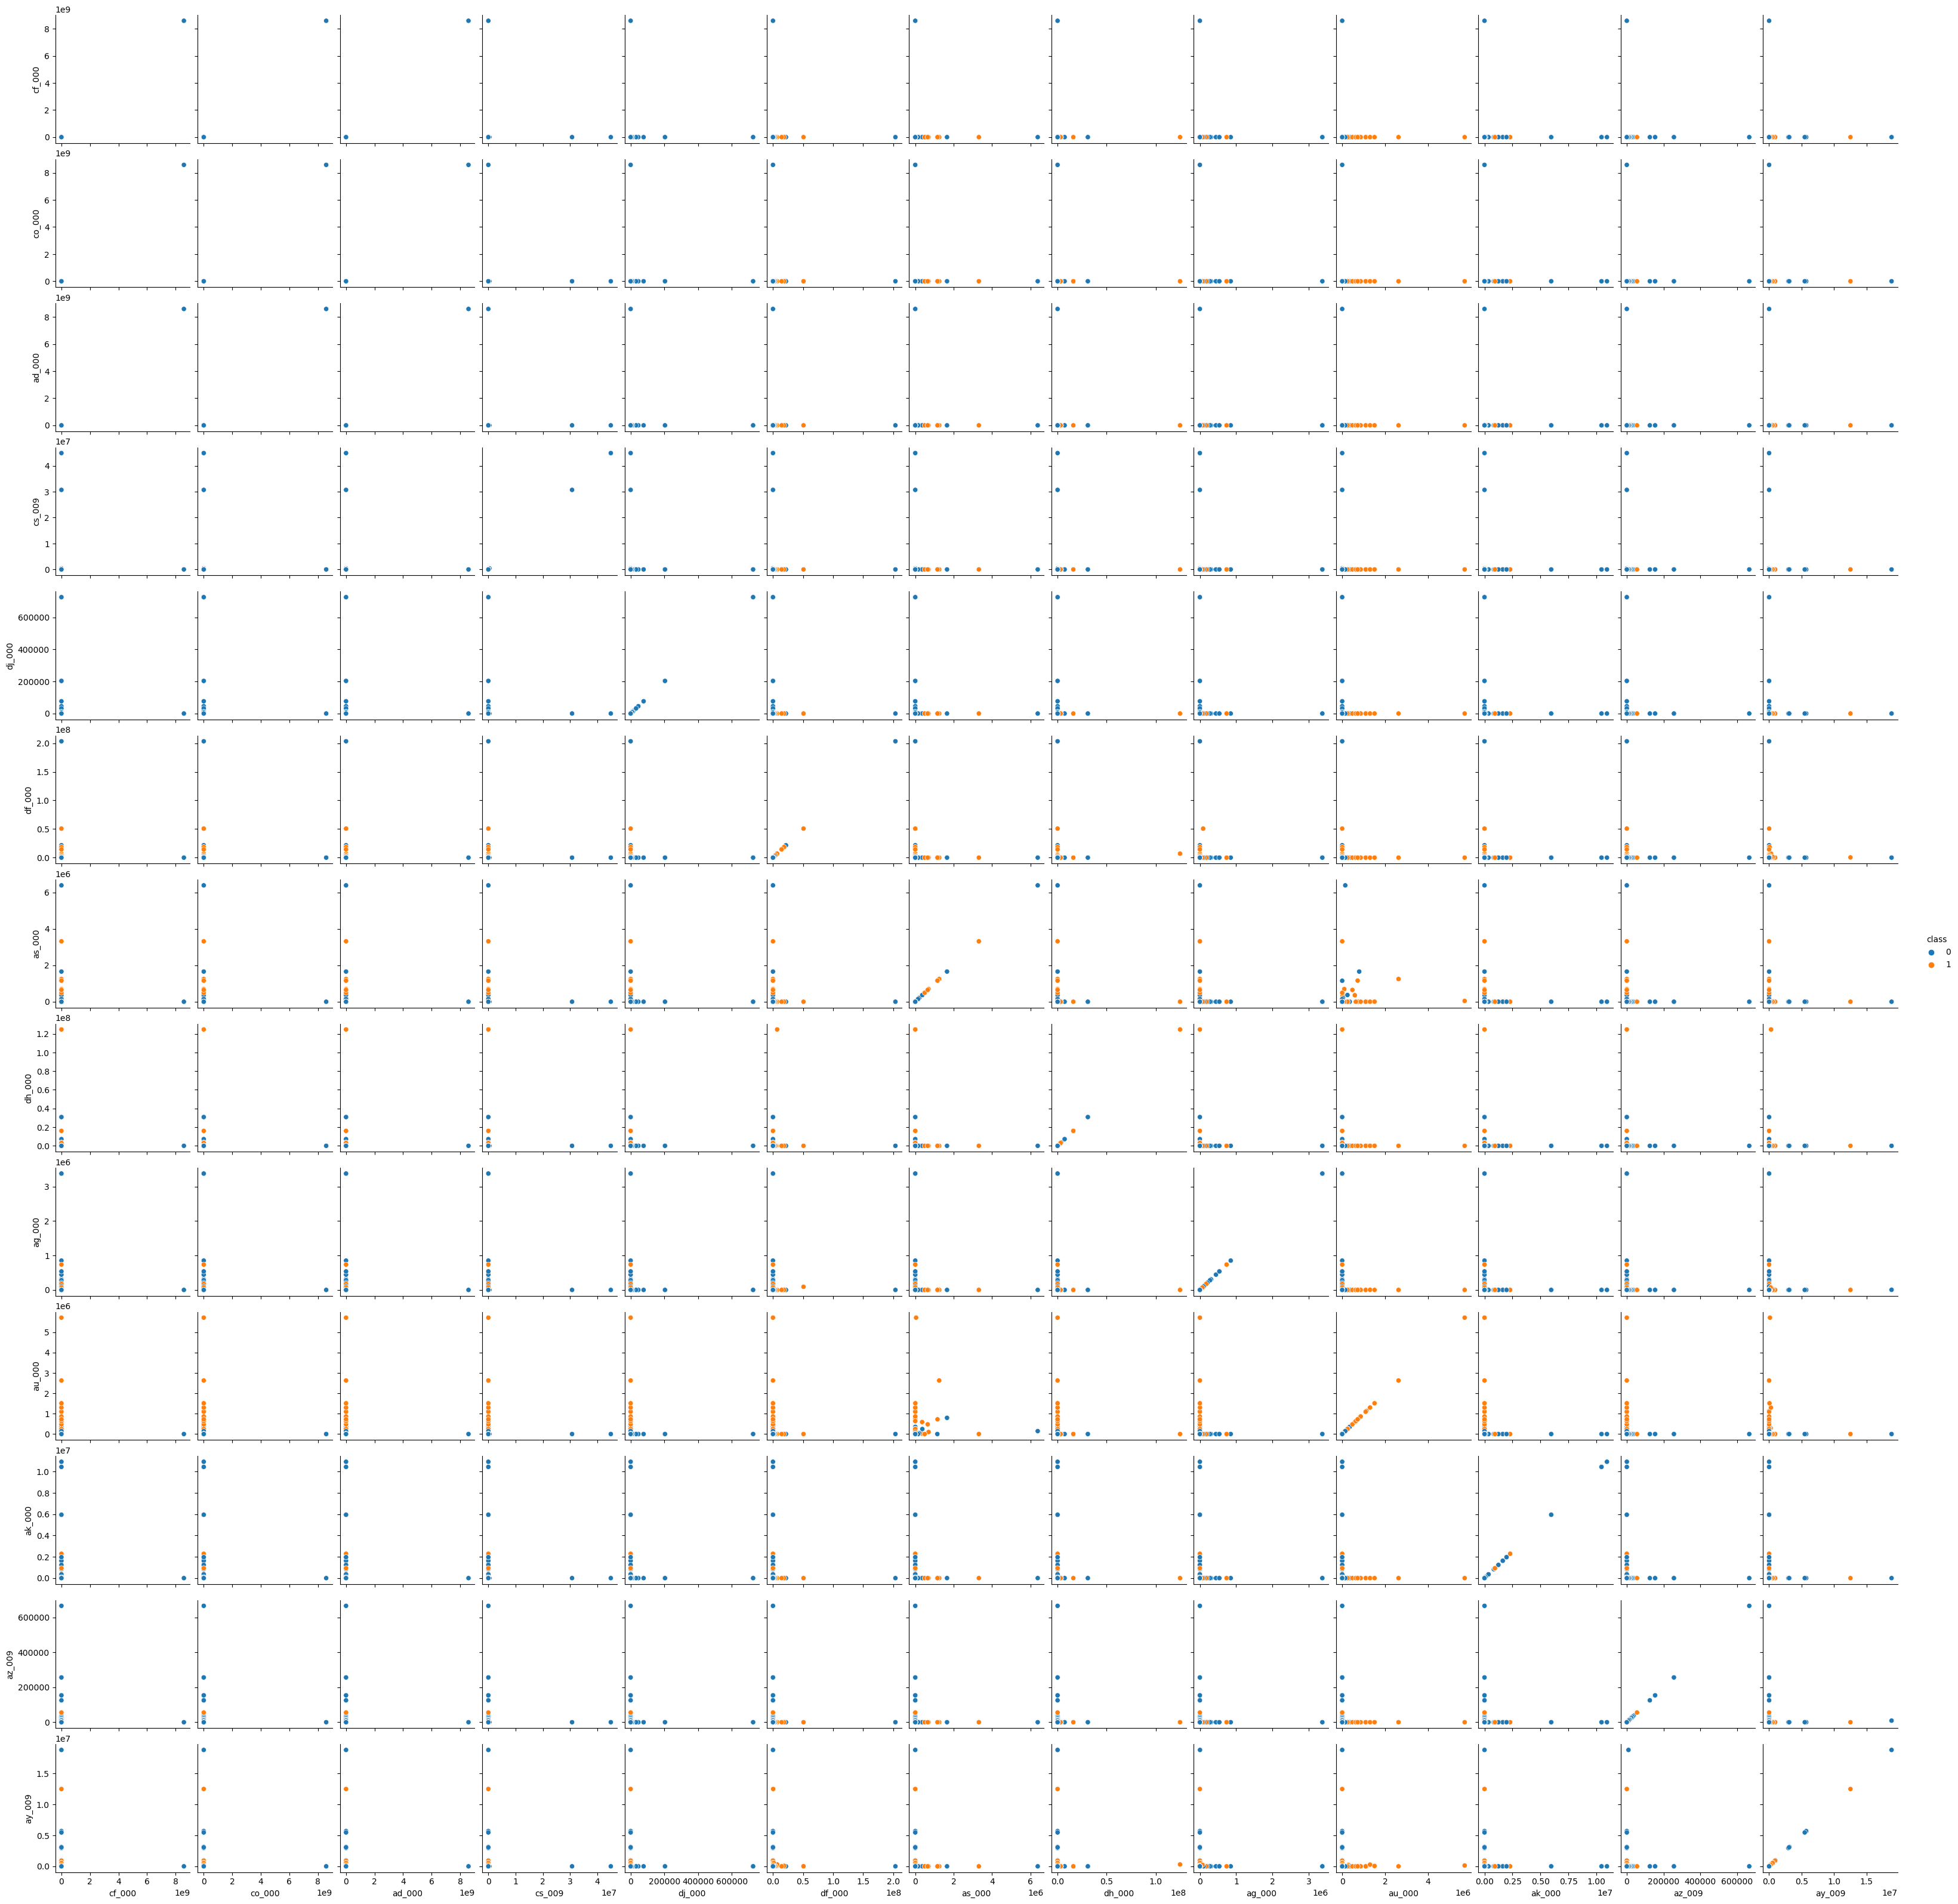

In [19]:

all_f=highest_cv_features.index.to_list()
all_f.append('class')

sns.pairplot(whole_data[all_f], diag_kind=None,hue='class')



Screenshot of scatterplot if above takes time:

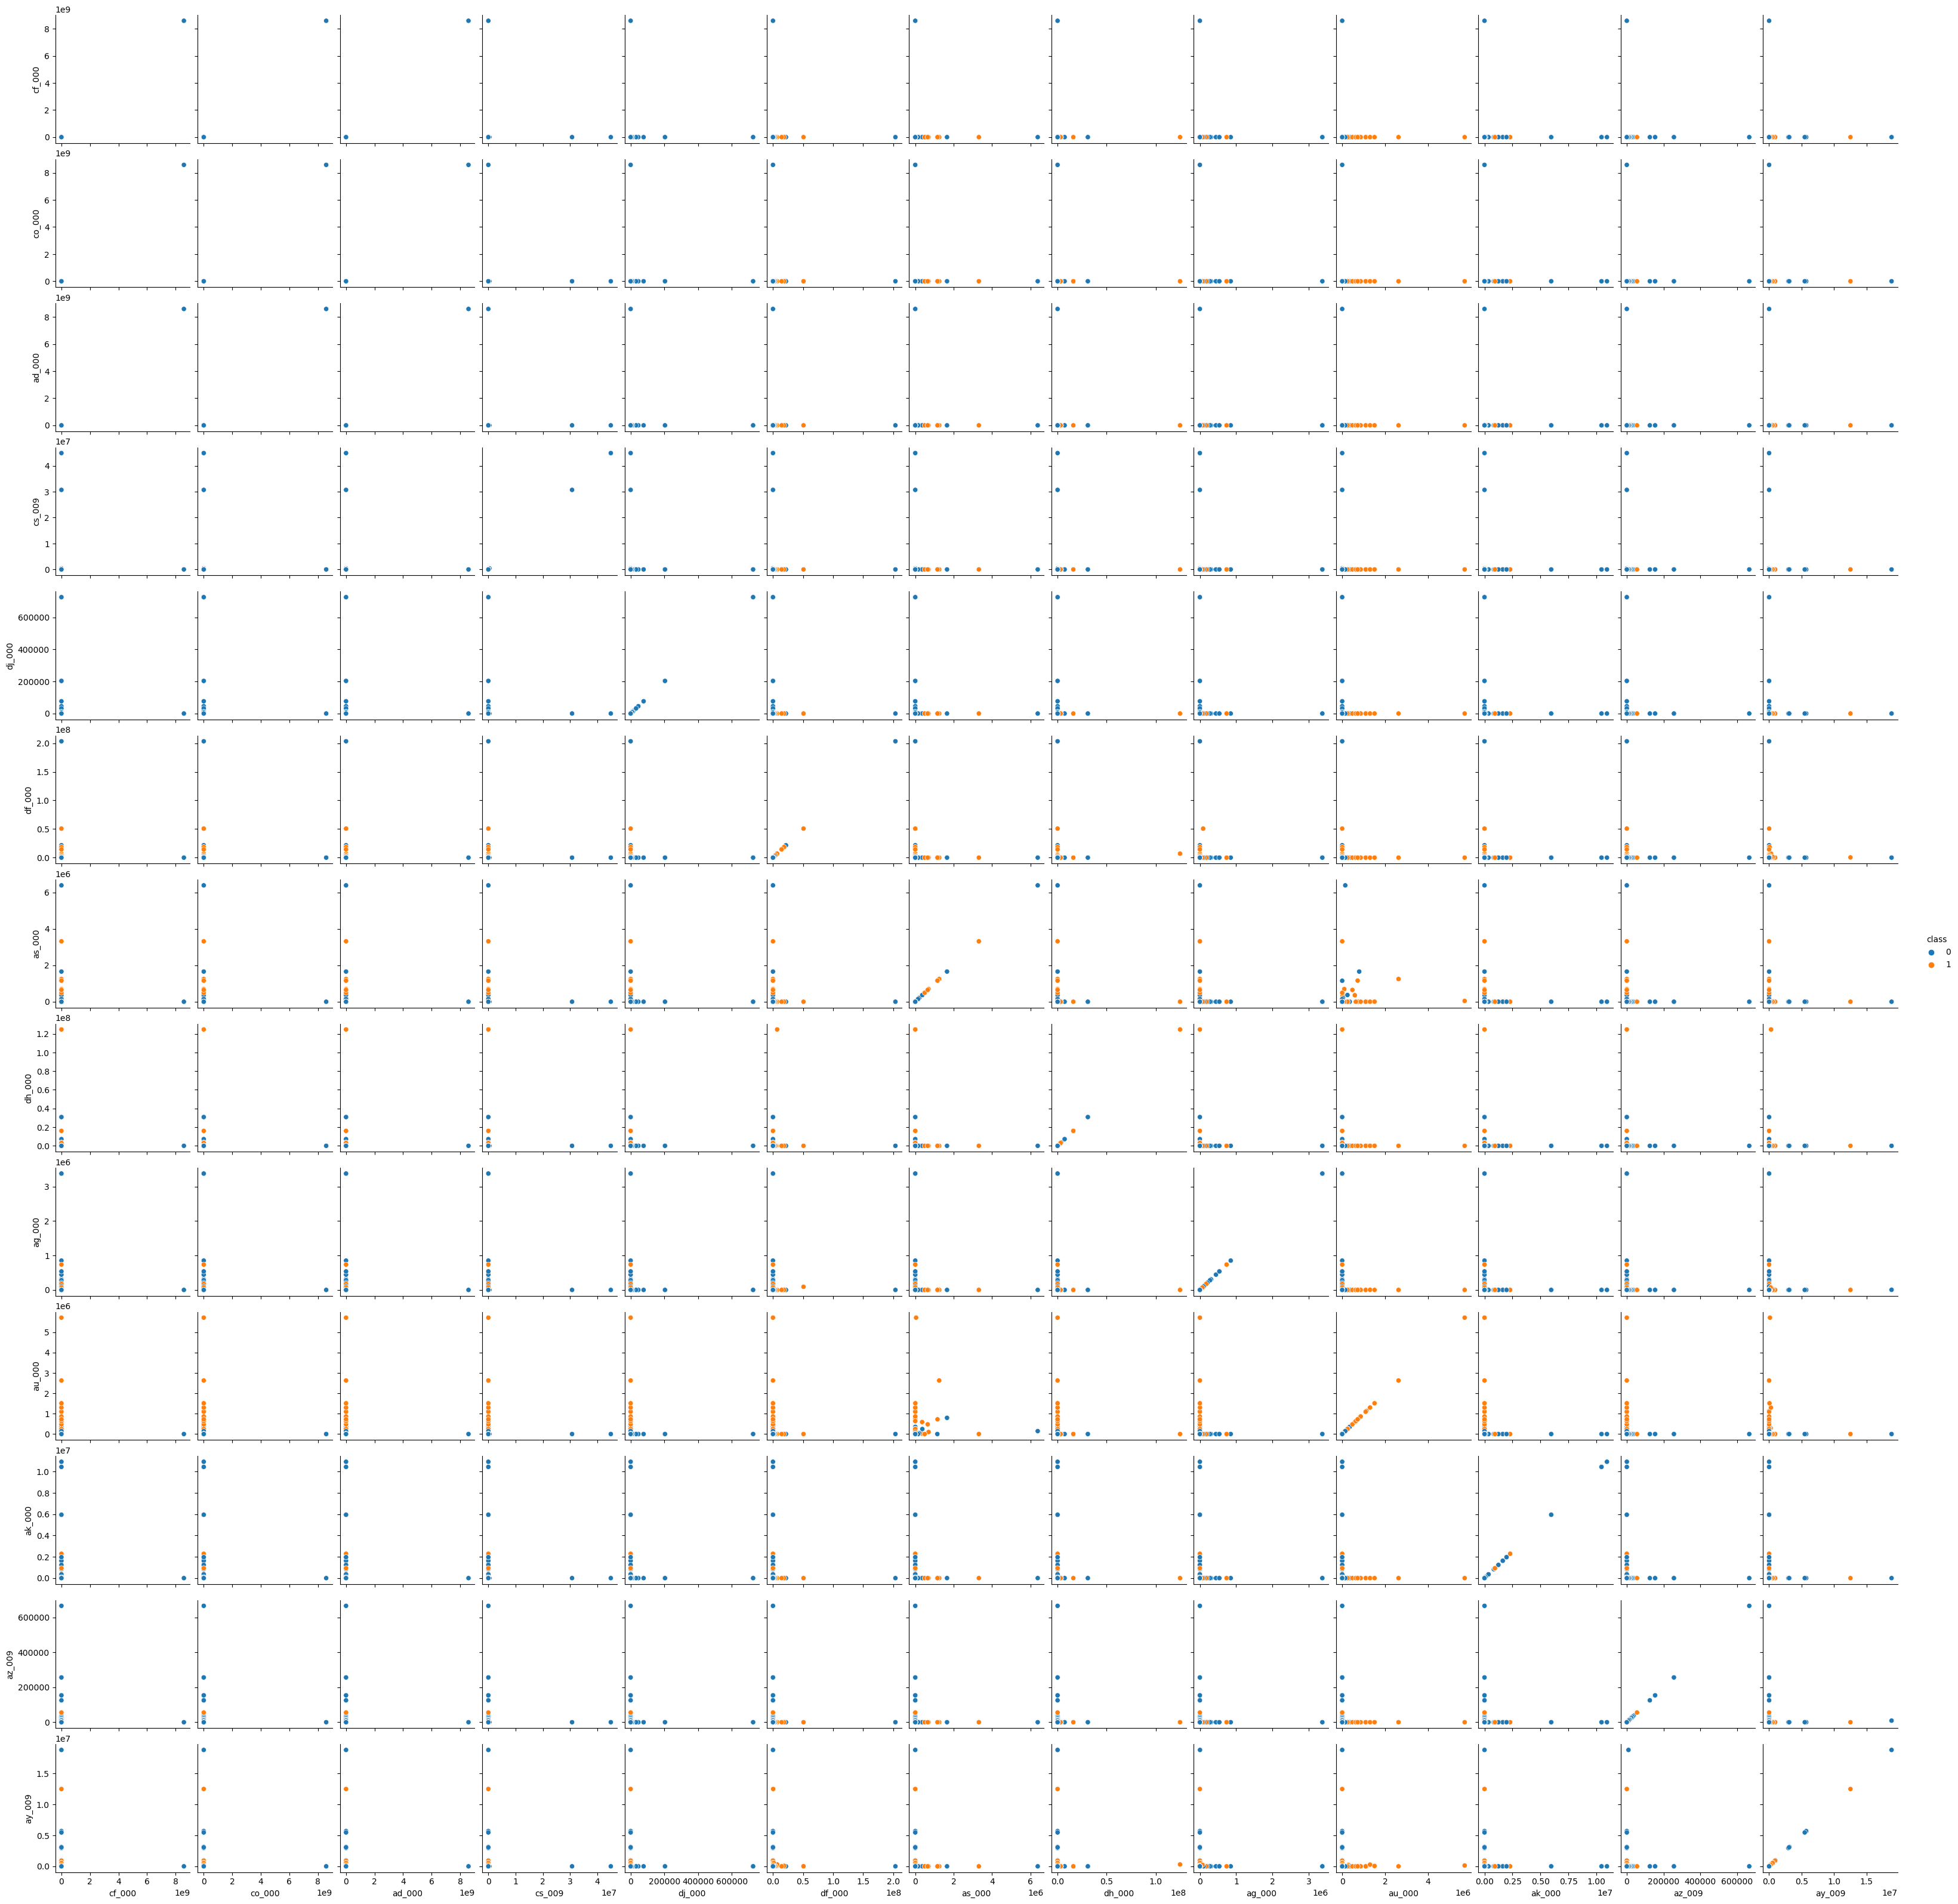

In [20]:
highest_cv_features.index.to_list()


['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'df_000',
 'as_000',
 'dh_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

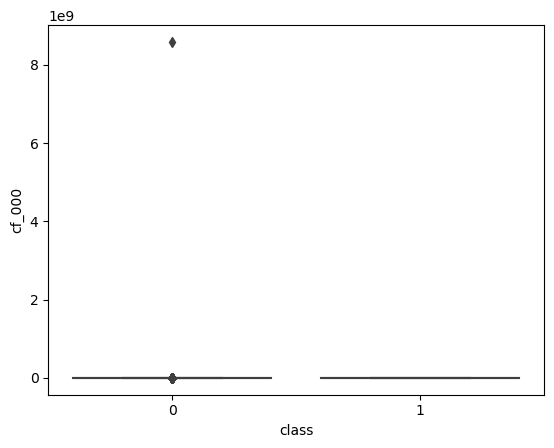

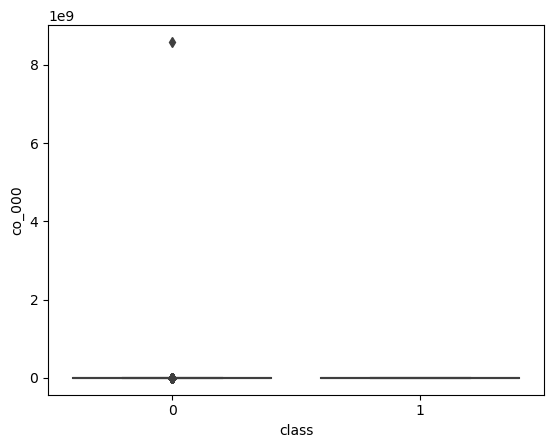

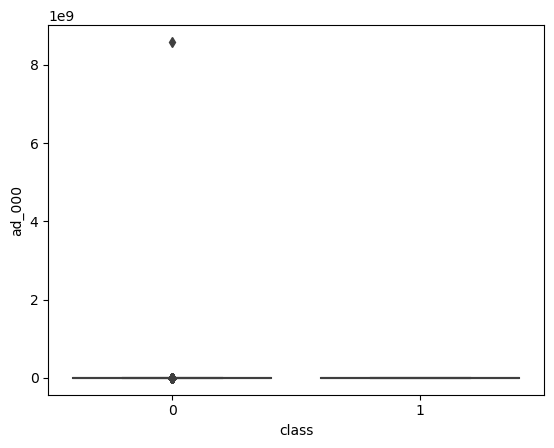

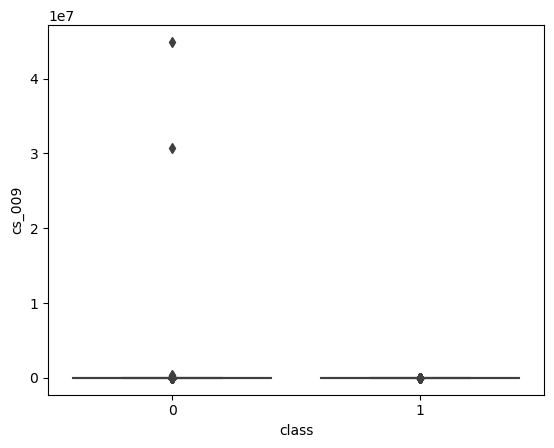

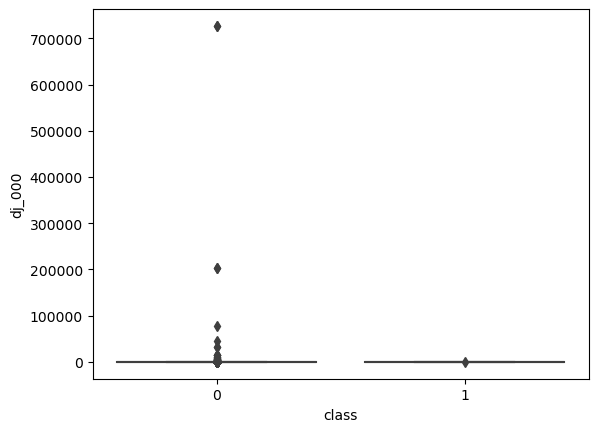

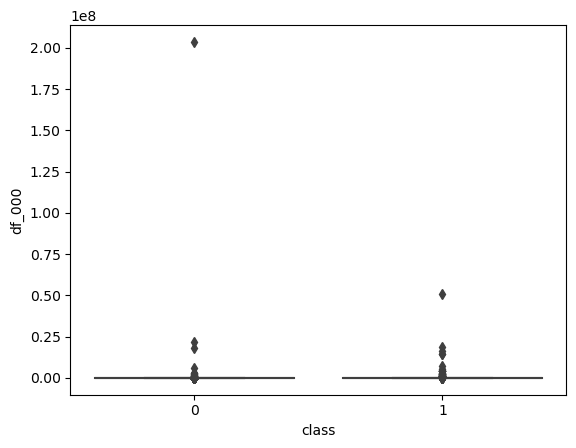

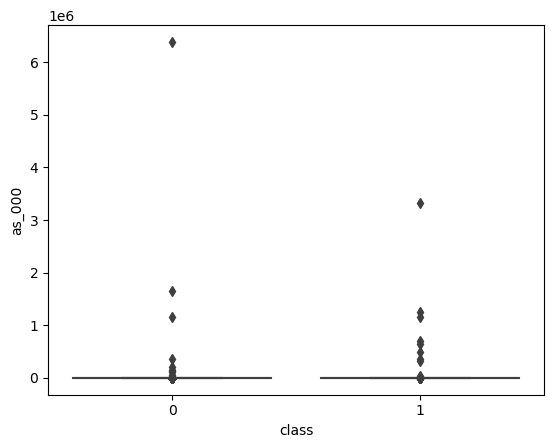

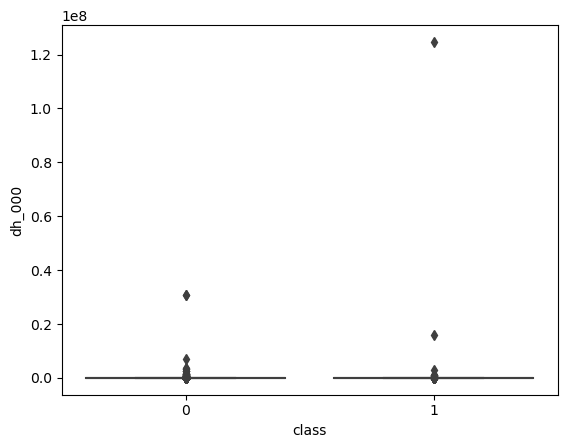

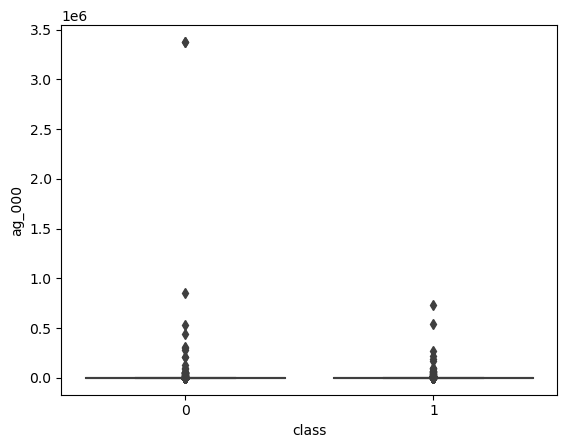

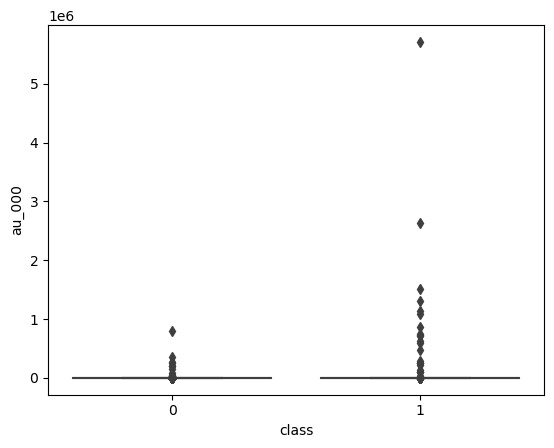

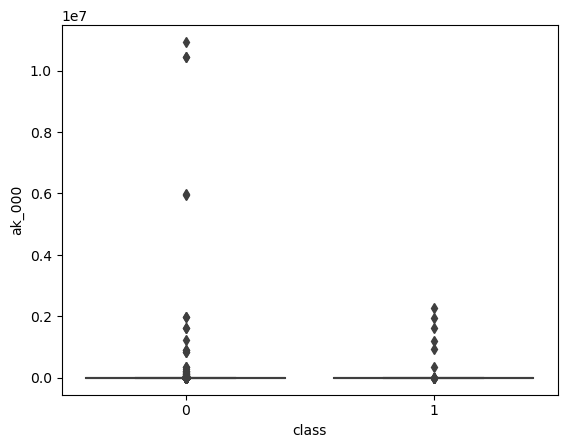

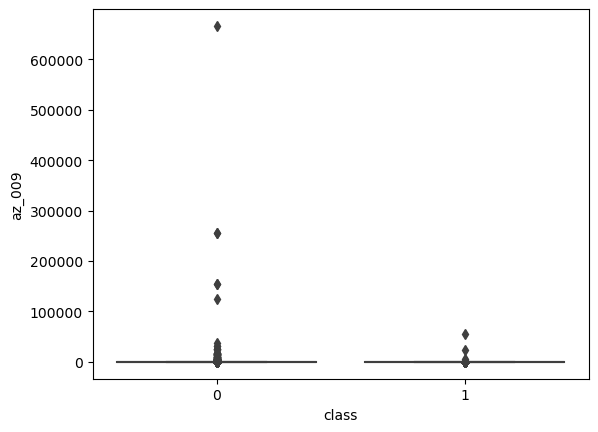

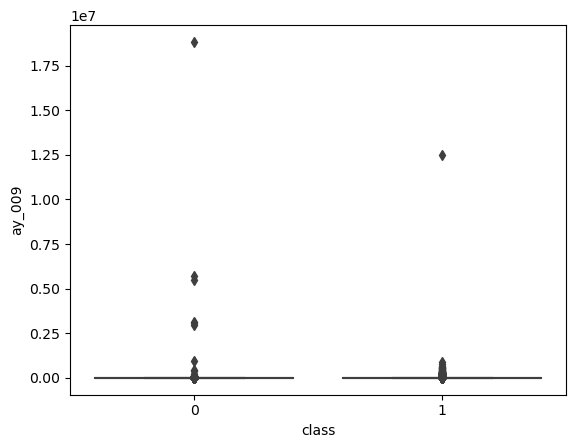

In [21]:
for col in highest_cv_features.index.to_list():
    b=sns.boxplot(data=whole_data,y=whole_data[col],x=whole_data['class'])
    plt.show()

<font color='blue'>
The scatteplots are truely scattered and it seems that no conclusion can be drawn solely from the scatterplot alone. Since the imputation strategy used is mean, any outlier can easily affect the datapoint.
</font>

#### (v) Is this data set imbalanced?

In [22]:
whole_data['class'].value_counts()

0    74625
1     1375
Name: class, dtype: int64

In [23]:
train_data['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [24]:
test_data['class'].value_counts()

0    15625
1      375
Name: class, dtype: int64

<font color='blue'>
A we can see , there is a clear imbalance in the data.A total of  Negative is 74625 and Positive is 1375. Lots of imbalance.
</font>

### (c) Train a random forest

In [25]:
def model_random_forest(x, y, is_balanced=False):
    
    if not is_balanced:
        #print("not balanced")
        model = RandomForestClassifier(oob_score=True,random_state=0)
        
    else:
        model = RandomForestClassifier(class_weight='balanced',oob_score=True)
        
    model.fit(x, y.values.ravel())
    
    return model

In [26]:
RF_model = model_random_forest(imputed_train_x, imputed_train_y)


In [27]:
train_y_predict = RF_model.predict(imputed_train_x)
train_y_prob = RF_model.predict_proba(imputed_train_x)

In [28]:
def cal_accu_score(ground_truth, predicted_truth):
    score = accuracy_score(ground_truth, predicted_truth)
    print(f'\nACCURACY SCORE is:', score)
    print(f'\nMISCLASSIFICATION ERROR :',1-score)

In [29]:
def confusion_matrix_func(ground_truth, predicted_truth):
    cm = confusion_matrix(ground_truth, predicted_truth)
    print(f' \nCONFUSION MATRIX : \n\n{cm}')


In [30]:
def get_roc_auc_score(ground_truth, prob):
    y_prob = prob[:, 1]
    score = roc_auc_score(ground_truth, y_prob)
    print(f'\nROC AUC Score is: {round(score, 4)}')
 

In [31]:
# function to plot the ROC curve and AUC
def create_roc_curve(true_y, predicted_y_prob, title, is_for_xgboost=False):
    
    y_prob = predicted_y_prob[:, 1]
    #pos_label=1
    if not is_for_xgboost:
        fpr, tpr, thresholds = roc_curve(true_y, y_prob,pos_label=1)
    else:
        fpr, tpr, thresholds = roc_curve(true_y, y_prob)
        
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title+" ROC")
    plt.plot([0, 1], [0, 1], "--")

    print('\nAUC=',roc_auc_score(true_y,y_prob))
    
    plt.show()
    

In [32]:
def model_summary(ground_truth, predicted_truth, prob, title, is_for_xgboost=False):
    print("---------------------------------------------------------")
    print("\t\t\tFOR ",title," DATA")
    print("---------------------------------------------------------")
    cal_accu_score(ground_truth, predicted_truth)
    confusion_matrix_func(ground_truth, predicted_truth)
    #if is_for_xgboost:
        #get_roc_auc_score(ground_truth, prob)
    create_roc_curve(ground_truth, prob, title, is_for_xgboost)


---------------------------------------------------------
			FOR  TRAINING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 1.0

MISCLASSIFICATION ERROR : 0.0
 
CONFUSION MATRIX : 

[[59000     0]
 [    0  1000]]

AUC= 1.0


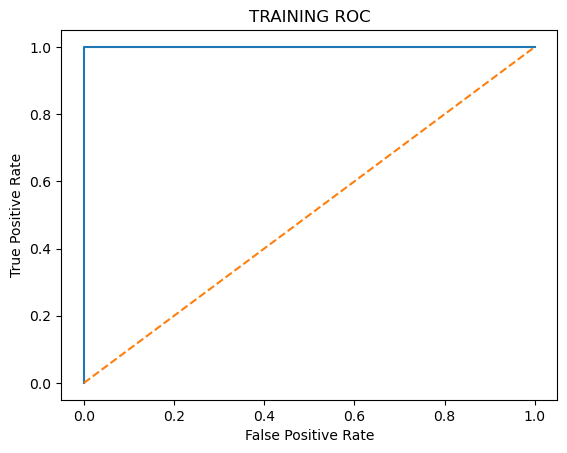

In [33]:
model_summary(imputed_train_y ,train_y_predict, train_y_prob, "TRAINING")  #for training

In [34]:
test_y_predicted = RF_model.predict(imputed_test_x)
test_y_prob = RF_model.predict_proba(imputed_test_x)


---------------------------------------------------------
			FOR  TESTING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 0.9920625

MISCLASSIFICATION ERROR : 0.007937500000000042
 
CONFUSION MATRIX : 

[[15606    19]
 [  108   267]]

AUC= 0.9931100159999999


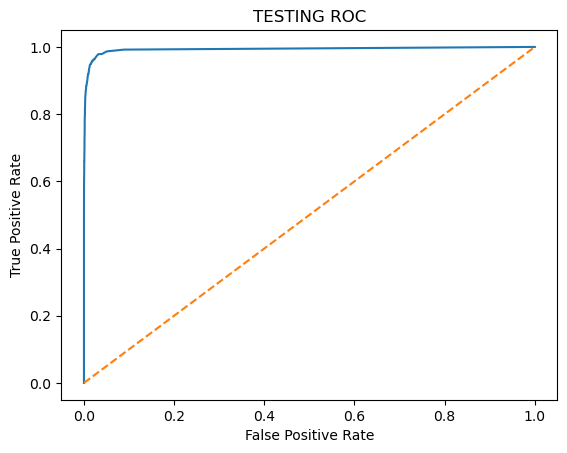

In [35]:
model_summary(imputed_test_y, test_y_predicted, test_y_prob, "TESTING")  # for testing

In [36]:
oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(imputed_test_y, test_y_predicted)

data = {
    'Out of Bag error estimate': [round(oob_error, 6)],
    'Testing Error': [round(test_error, 6)]
}
data = pd.DataFrame(data=data)
data

Out of Bag error estimate  Testing Error
0                   0.006033       0.007938


The OOB error estimate is the internal measure of the random forest's performance and the test error is an external measure of the model's performance on new data.
As we can see OOB error estimate and test error are almost similar or close., it indicates that the model is performing well on both the training data and the test data, and is likely to generalize well to new unseen data.

### (d) Research class imbalance in random forest

<font color='blue'>
2 ways to handl class imbalance <br>

1) BalancedRandomForestClassifier <br>
A balanced random forest classifier. A balanced random forest randomly under-samples each boostrap sample to balance it.<br>
    
2) RandomForestClassifier with class_weight='balanced' <br>
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
   
Here, I have used the second approach.
    </font>

FOR BALANCED THE DATA
---------------------------------------------------------
			FOR  TRAINING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 1.0

MISCLASSIFICATION ERROR : 0.0
 
CONFUSION MATRIX : 

[[59000     0]
 [    0  1000]]

AUC= 1.0


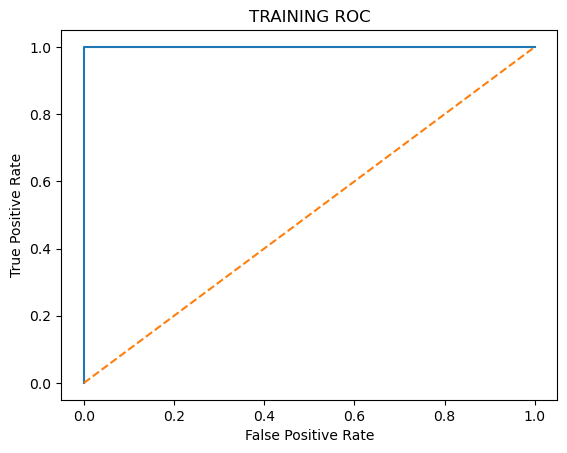

In [37]:
#to handle class imbalance
print("FOR BALANCED THE DATA")
RF_model = model_random_forest(imputed_train_x, imputed_train_y, is_balanced=True)

train_y_predict = RF_model.predict(imputed_train_x)
train_y_prob = RF_model.predict_proba(imputed_train_x)

model_summary(imputed_train_y ,train_y_predict, train_y_prob, "TRAINING")  # for training

---------------------------------------------------------
			FOR  Testing  DATA
---------------------------------------------------------

ACCURACY SCORE is: 0.988875

MISCLASSIFICATION ERROR : 0.011125000000000052
 
CONFUSION MATRIX : 

[[15609    16]
 [  162   213]]

AUC= 0.9919977813333333


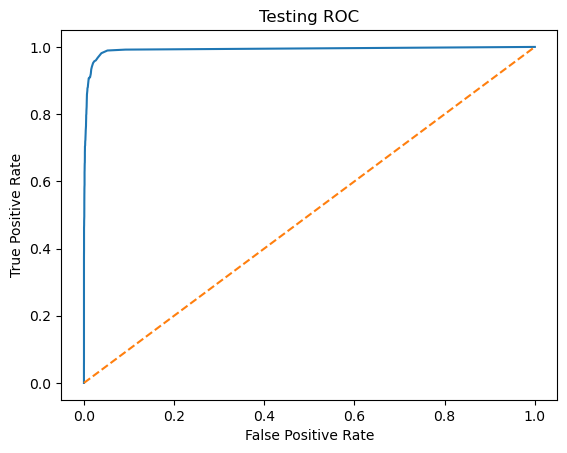

In [38]:
# for testing

test_y_predicted = RF_model.predict(imputed_test_x)
test_y_prob = RF_model.predict_proba(imputed_test_x)
model_summary(imputed_test_y, test_y_predicted, test_y_prob, "Testing")

In [39]:
# calculating oob error
print("For Balanced data:")
oob_error_2 = 1 - RF_model.oob_score_
test_error_2 = 1 - accuracy_score(imputed_test_y, test_y_predicted)

data = {
    'OOB Error Estimate': [round(oob_error_2, 6)],
    'Testing Error': [round(test_error_2, 6)]
}
data = pd.DataFrame(data=data)
data


For Balanced data:


OOB Error Estimate  Testing Error
0              0.0078       0.011125

In this case, oob error estimate is less than test error.

In [40]:
summary={
    
    'OOB_IMBALANCED':[oob_error],
    'OOB_BALANCED':[oob_error_2],
    'TEST_ERROR_IMBALANCED':[test_error],
    'TEST_ERROR_BALANCED':[test_error_2]
}
summary = pd.DataFrame(data=summary)
summary

OOB_IMBALANCED  OOB_BALANCED  TEST_ERROR_IMBALANCED  TEST_ERROR_BALANCED
0        0.006033        0.0078               0.007938             0.011125

<font color='blue'>
 The imbalanced data random forest has less test error,less oob error estimate and slightly greater auc  compared to the random forest obtained by balancing.
This data set has imbalanced data due to which there is a possibility that the model tends to predict a sample as negative (or  0) to reach a higher accuracy. This might be the reason that we can see that the case without compensation has a better overall performance.
</font>

### (e) XGBoost and Model Trees

In [41]:
ss = StandardScaler()

train_x_cols = imputed_train_x.columns
test_x_cols = imputed_test_x.columns

x_train = pd.DataFrame(ss.fit_transform(imputed_train_x),columns=train_x_cols)
x_test = pd.DataFrame(ss.fit_transform(imputed_test_x),columns=test_x_cols)



In [42]:
param_grid = {
    "reg_alpha": [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}


XGB_estimator = XGBClassifier(objective='reg:logistic')



In [43]:
cv = KFold(n_splits=5,shuffle=True,random_state=11)
grid_cv = GridSearchCV(XGB_estimator, param_grid, n_jobs=-1, cv=cv, scoring="accuracy")

grid_cv.fit(x_train, imputed_train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=

In [44]:
print('BEST ALPHA : ',grid_cv.best_params_, '  WITH CV ACCURACY: ',round(grid_cv.best_score_,6))
cv_error=1-grid_cv.best_score_
print('CV ERROR',round(cv_error,6))

BEST ALPHA :  {'reg_alpha': 0.1}   WITH CV ACCURACY:  0.9947
CV ERROR 0.0053


In [45]:
alpha = grid_cv.best_params_['reg_alpha']

xgb_clf = XGBClassifier(objective='reg:logistic',reg_alpha=alpha)
xgb_clf.fit(x_train, imputed_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='reg:logistic', predictor=None, ...)

In [46]:
y_train_pred = xgb_clf.predict(x_train)

y_train_pred_prob = xgb_clf.predict_proba(x_train)

y_test_pred = xgb_clf.predict(x_test)

y_test_pred_prob = xgb_clf.predict_proba(x_test)

---------------------------------------------------------
			FOR  TRAINING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 0.9999833333333333

MISCLASSIFICATION ERROR : 1.666666666666483e-05
 
CONFUSION MATRIX : 

[[59000     0]
 [    1   999]]

AUC= 1.0


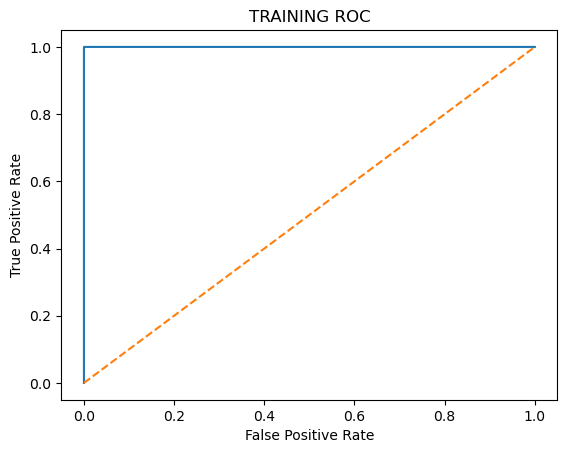

In [47]:
model_summary(imputed_train_y, y_train_pred, y_train_pred_prob, "TRAINING", is_for_xgboost=True)

---------------------------------------------------------
			FOR  TESTING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 0.993

MISCLASSIFICATION ERROR : 0.007000000000000006
 
CONFUSION MATRIX : 

[[15603    22]
 [   90   285]]

AUC= 0.9881502719999999


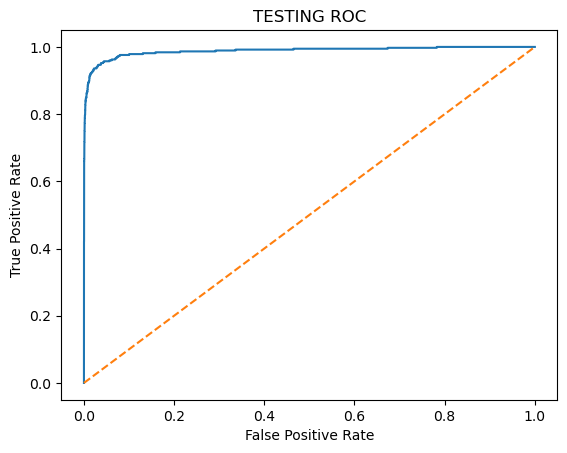

In [48]:
model_summary(imputed_test_y, y_test_pred, y_test_pred_prob, "TESTING", is_for_xgboost=True)

In [49]:
print("SUMMARY")
test_err = 1 - accuracy_score(imputed_test_y, y_test_pred)
train_err=1 - accuracy_score(imputed_train_y, y_train_pred)

summary={
    
    'CV ERROR':[cv_error],
    'TEST_ERROR':[test_err],
    'TRAIN_ERROR':[train_err]
}

summary=pd.DataFrame(data=summary)
summary

SUMMARY


CV ERROR  TEST_ERROR  TRAIN_ERROR
0    0.0053       0.007     0.000017

<font color='blue'>
 Here we can see that for 'XGBoost Model Trees' the Test error is more than validation error and train error of best model.
</font>

### (f) Use SMOTE to pre-process your data

 <font color='blue'>
 Using smote to manage the imbalance: <br>
 
The right way to use SMOTE during cross validation is to only apply smote to the train folds and not using the the validation fold.It's important to ensure that the oversampling is only performed on the training data, and not on the validation data, to avoid data leakage and overfitting. <br>
Below shows the right implemented way.
</font>

In [50]:
alpha_list=[10**i for i in range(-4,4)]
max_val=0
chosen_alpha=0

kf = KFold(n_splits=5)

for alpha in alpha_list:
    cv_score=[]
    print('alpha=',alpha)
    
    for fold, (train_index, test_index) in enumerate(kf.split(imputed_train_x), 1):
        
        X_train_fold = imputed_train_x.iloc[train_index,:]
        y_train_fold = imputed_train_y.iloc[train_index]
        
        X_test_fold = imputed_train_x.iloc[test_index,:]
        y_test_fold = imputed_train_y.iloc[test_index]  
        
        sm = SMOTE()
        
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_fold, y_train_fold)
        
        model = XGBClassifier(objective='reg:logistic',reg_alpha=alpha)
        
        model.fit(X_train_oversampled, y_train_oversampled )  
        
        y_pred = model.predict(X_test_fold)
        
        cv_score.append(accuracy_score(y_test_fold,y_pred))
        print(f'For fold {fold}:')
        print(f'Accuracy: {accuracy_score( y_test_fold,y_pred)}')
        print(f'f-score: {f1_score(y_test_fold, y_pred)}')
    print('alpha=',alpha,' cv score=',mean(cv_score))
    if(mean(cv_score)>max_val):
        max_val=mean(cv_score)
        chosen_alpha=alpha
        
print("BEST ALPHA",chosen_alpha)
print("BEST CV score",max_val)

alpha= 0.0001
For fold 1:
Accuracy: 0.9936666666666667
f-score: 0.8318584070796461
For fold 2:
Accuracy: 0.9938333333333333
f-score: 0.8254716981132076
For fold 3:
Accuracy: 0.99325
f-score: 0.7917737789203085
For fold 4:
Accuracy: 0.9935
f-score: 0.7958115183246074
For fold 5:
Accuracy: 0.99375
f-score: 0.7967479674796748
alpha= 0.0001  cv score= 0.9936
alpha= 0.001
For fold 1:
Accuracy: 0.9935
f-score: 0.8304347826086957
For fold 2:
Accuracy: 0.99375
f-score: 0.8235294117647058
For fold 3:
Accuracy: 0.9926666666666667
f-score: 0.7777777777777777
For fold 4:
Accuracy: 0.9939166666666667
f-score: 0.8093994778067884
For fold 5:
Accuracy: 0.99425
f-score: 0.810958904109589
alpha= 0.001  cv score= 0.9936166666666667
alpha= 0.01
For fold 1:
Accuracy: 0.9925833333333334
f-score: 0.8077753779697625
For fold 2:
Accuracy: 0.99425
f-score: 0.8384074941451991
For fold 3:
Accuracy: 0.9928333333333333
f-score: 0.7772020725388602
For fold 4:
Accuracy: 0.9943333333333333
f-score: 0.8210526315789473


In [51]:

cv_error=1-max_val


xgb_best_smote=XGBClassifier(objective='reg:logistic',reg_alpha=chosen_alpha)

sm = SMOTE()

X_train_oversampled, y_train_oversampled = sm.fit_resample(imputed_train_x, imputed_train_y)

xgb_best_smote.fit(X_train_oversampled,y_train_oversampled)

y_pred_train=xgb_best_smote.predict(imputed_train_x)

y_pred_prob_train=xgb_best_smote.predict_proba(imputed_train_x)

y_pred_test=xgb_best_smote.predict(imputed_test_x)

y_pred_prob_test=xgb_best_smote.predict_proba(imputed_test_x)


In [52]:
data = {
    "Before SMOTE": imputed_train_y.value_counts(),
    "After SMOTE": y_train_oversampled .value_counts()
}

df = pd.DataFrame(data=data)
df

Before SMOTE  After SMOTE
class                           
0             59000        59000
1              1000        59000

---------------------------------------------------------
			FOR  TRAINING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 0.9999833333333333

MISCLASSIFICATION ERROR : 1.666666666666483e-05
 
CONFUSION MATRIX : 

[[59000     0]
 [    1   999]]

AUC= 0.9999961949152543


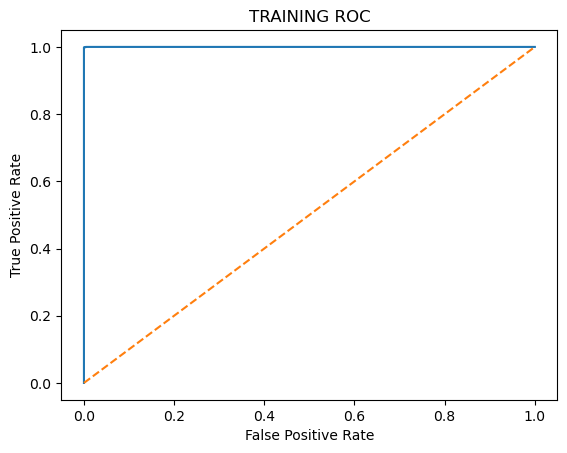

In [53]:
model_summary(imputed_train_y, y_pred_train, y_pred_prob_train, "TRAINING", is_for_xgboost=True)

---------------------------------------------------------
			FOR  TESTING  DATA
---------------------------------------------------------

ACCURACY SCORE is: 0.9928125

MISCLASSIFICATION ERROR : 0.007187500000000013
 
CONFUSION MATRIX : 

[[15578    47]
 [   68   307]]

AUC= 0.994405376


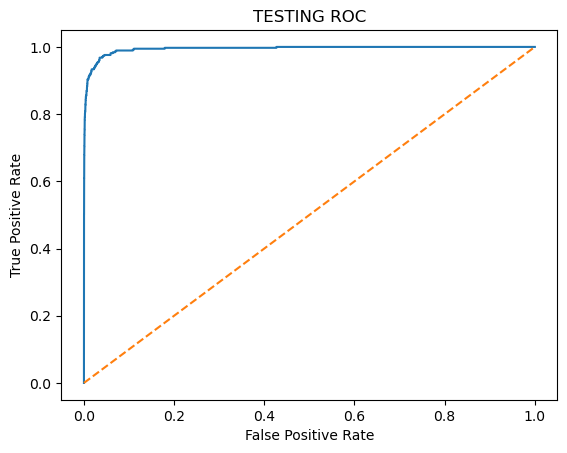

In [54]:
model_summary(imputed_test_y, y_pred_test, y_pred_prob_test, "TESTING", is_for_xgboost=True)

In [55]:
print("SUMMARY")
test_err1 = 1 - accuracy_score(imputed_test_y, y_pred_test)
train_err1=1 - accuracy_score(imputed_train_y, y_pred_train)
summary={
    
    'CV_ERROR':[round(cv_error,6)],
    'TEST_ERROR':[round(test_err1,6)],
    'TRAIN_ERROR':[round(train_err1,6)]
}

summary=pd.DataFrame(data=summary)
summary

SUMMARY


CV_ERROR  TEST_ERROR  TRAIN_ERROR
0  0.006383    0.007188     0.000017

In this case, we observe that the test error is slightly more than the validation error. Also test error is greater than train error.

In [56]:
d={
    
    'UNCOMPENSATED_TESTERR ':[round(test_err,7)],
    'COMPENSATED_TESTERR':[round(test_err1,7)]
}

d=pd.DataFrame(data=d)
d

UNCOMPENSATED_TESTERR   COMPENSATED_TESTERR
0                   0.007             0.007188

<font color='blue'>
Here, we can see that uncompensated case has very slightly less (almost similar) test error than the compensated case. <br>
But comparing  the above confusion matrices of both cases, we can observe more classifications to the smaller class (pos class or 1) in compensated case, so it might be a good idea to use smote to balance the data.
</font>

## 2. ISLR 6.6.3

#####  Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

##### i. Increase initially, and then eventually start decreasing in an inverted U shape.
##### ii. Decrease initially, and then eventually start increasing in a U shape.
##### iii. Steadily increase.
##### iv. Steadily decrease.
##### v. Remain constant.

#####  (a) As we increase s from 0, the training RSS will:  <br>

<font color='blue'>
Ans: iv. Steadily Decrease:

As we increase s from 0. the training RSS will reduce steadily.
When s=0, then there is lot of error since all the coefficients Bj would be 0. As we increase s value, the Bj value would increase and would stabilize at the least square error value.The model will overfit on the training data letting all Bj to have some value which would lead to least the train error.
</font>

##### (b) Repeat (a) for test RSS. <br>

<font color='blue'>
Ans: ii. Decrease Initially and then eventually starts increasing in a U shape. <br>
When s=0  all coefficients Bj  are 0, the model is extremely simple and has a high test RSS. As we increase s,
Bj assume non-zero values and model starts fitting well on test data and so test RSS decreases. Eventually, as Bj approach their some full blown values, they start overfitting to the training data, increasing test RSS.
</font>



##### (c) Repeat (a) for variance .<br>

<font color='blue'>
Ans.iii.Steadily increase. <br>
Variance increases steadily. The variance is 0 when s is 0 because there is a constant model. As s increases the model starts becoming more flexible due to more Bi taking values and thus increasing the variance. Hence variance increases steadily.
</font>




##### (d) Repeat (a) for (squared) bias. <br>
<font color='blue'>
Ans: iv. Steadily Decrease: <br>
Due to the bias-variance trade-off, since the variance is increasing, the bias will decrease.<br>
Also, when s is 0, the bias is very high since the model basically predicts same constant value. As more Bi values come into picture, the bias reduces and as the model overfits on the data, the bias goes lower and lower.
</font>

##### (e) Repeat (a) for the irreducible error. <br>
<font color='blue'>
Ans:v. Remain constant. <br>
Irreducible error is act of god and is present in any machine learning model that is built and hence it will remain constant.
This does not depend on the model or s or any other hyperparameters whatsoever and always is constant.
</font>

## 3. ISLR 6.6.5

Please refer to the pdf attached.

## 4. ISLR 8.4.5

##### Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

<font color='blue'>
Ans:<br>
In this, probabilities P(class=red|X) >= 0.5 will be true and the classification will be false otherwise.<br>
1.Majority Polling:<br>
So here, for P(Class is Red|X): 0.1, 0.15, 0.2, 0.2 ; total False = 4 <br>
And for P(Class is Red|X): 0.55, 0.6, 0.6, 0.65, 0.7,0.75; total True = 6 <br>
Here the majority is for total True=6. <br>
Therefore the red samples are larger than green samples and P(Class is Red|X)=True; so the classification will be <font color='red'>red class.</font> <br><br>
2. Average Probability: <br>
Mean for given probabilities = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.450.<br>
Since it is less than 0.5,  which mean P(class in red/X)= False; the final prediction is <font color='green'> green. </font>
</font>

## 5. ISLR 9.7.3

Please refer to the pdf attached.